### Importing the Libraries


In [2]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style for the matplotlib
plt.style.use('seaborn')

#To ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking if the values is null or not

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Checking the data-types of features

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Spliting the data for the model building

In [8]:
# Now lets start making the model
# First let split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Id','Species'], axis=1), df['Species'], test_size=0.2, random_state=0)

### Cross validation of the data

In [9]:
# Cross_validation of data and importing the Decision tree classifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()
#dtc.fit(x_train, y_train)
acc = cross_val_score(dtc, x_train, y_train, scoring = "accuracy", cv = 10)
acc

array([0.91666667, 0.91666667, 0.83333333, 1.        , 1.        ,
       1.        , 0.83333333, 0.91666667, 0.91666667, 0.91666667])

### Training and predicting the dataset

In [10]:
# Training and predicting
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

### Checking the accuracy through confusion matrix and accuracy score

accuracy is  1.0


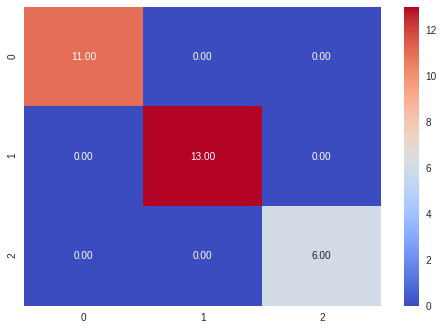

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="0.2f",cmap="coolwarm")
print("accuracy is ", accuracy_score(y_test,y_pred))
plt.show()

### Visualising the Decision tree classifier

[Text(697.5, 996.6, 'SepalWidthCm <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-versicolor'),
 Text(590.1923076923077, 815.4000000000001, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-virginica'),
 Text(804.8076923076923, 815.4000000000001, 'PetalLengthCm <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-versicolor'),
 Text(429.2307692307692, 634.2, 'SepalWidthCm <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-setosa'),
 Text(214.6153846153846, 453.0, 'PetalLengthCm <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-setosa'),
 Text(107.3076923076923, 271.79999999999995, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-setosa'),
 Text(321.9230769230769, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-versicolor'),
 Text(643.8461538461538, 453.0, 'PetalLengthCm <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-versicolor'),
 Text(

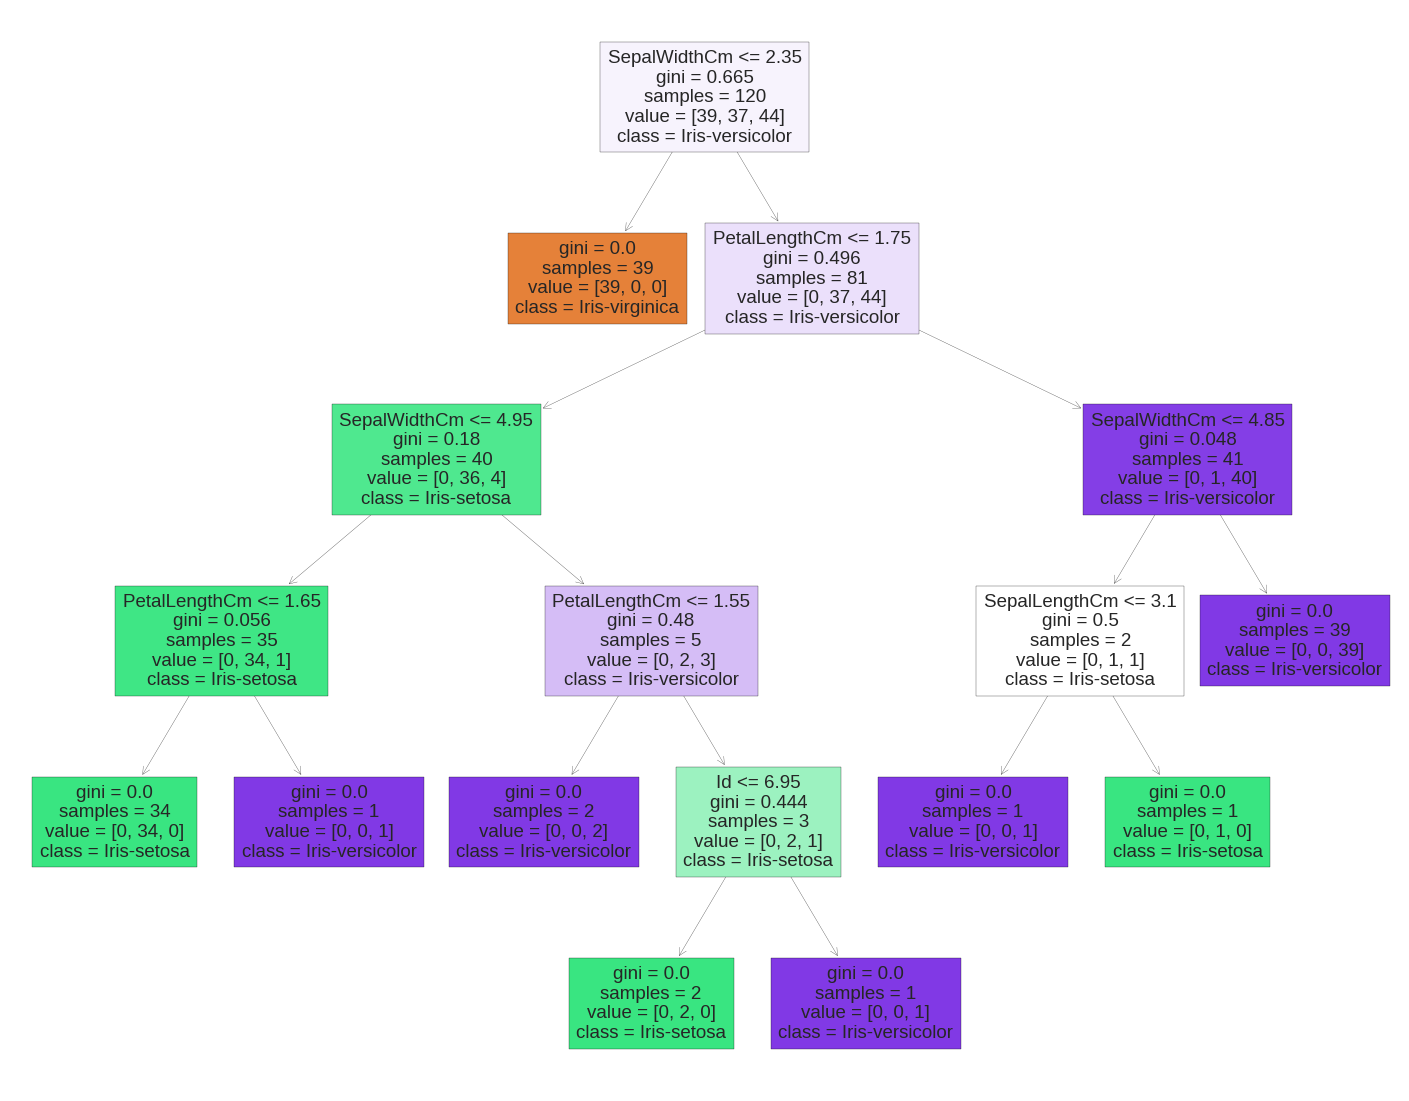

In [13]:
# Visualising the decision tree graph
plt.figure(figsize=(25,20))
plot_tree(dtc,feature_names=df.columns,class_names=df['Species'].value_counts().index,filled=True)

## Thank You for reading this! Have a nice day!!